# import modules

In [1]:
import sys

sys.path.insert(0, "../")

from modules.Classes_ver2 import *
from modules.default_params_ver1 import *
from modules.functions_ver2 import *
from modules.contours_ver1 import *

print("Number of cores: ", cpu_count())

Number of cores:  8


# assign params

In [19]:
lens_params_1["mcz"] = RP_params_1["mcz"] = 30 * solar_mass

# as a function of $\Delta t_d$ while fixing $I$

In [22]:
lens_params, RP_params = set_to_params(lens_params_1, RP_params_1)

RP_params["omega_tilde"] = 3.0

MLz_limits = get_lens_limits_for_RP_L(RP_params)
print(MLz_limits)

MLz_limits = get_lens_limits_for_RP_L(RP_params, lower=0.5)
print(MLz_limits)

{'MLz_min': 403.8448150570481, 'MLz_max': 4623.659020079905, 'td_min': 0.0039892110766206225, 'td_max': 0.045672870096930815}
{'MLz_min': 1155.9147550199762, 'MLz_max': 4623.659020079905, 'td_min': 0.011418217524232704, 'td_max': 0.045672870096930815}


In [16]:
MLz_arr = np.linspace(1150, 4000, 10)

mismatch_contours_td = create_mismatch_contours_td(RP_params, lens_params, MLz_arr)

In [15]:
mismatch_contours_td = get_contours_stats(mismatch_contours_td, thres_diff=0.01)

In [25]:
filepath = pickle_data(mismatch_contours_td, "../data", "mismatch_contours_mcz30_td_ver6")

Results saved as ../data/mismatch_contours_mcz30_td_ver6_2024-05-02_09-21-37.pkl


In [7]:
filepath = "../data/mismatch_contours_mcz30_td_ver6_2024-05-02_09-21-37.pkl"
with open(filepath, "rb") as f:
    mismatch_contours_td = pickle.load(f)

mismatch_contours_td

{0.01136: {'contour': {'omega_matrix': array([[0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
           2.6, 2.8, 3. ],
          [0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
           2.6, 2.8, 3. ],
          [0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
           2.6, 2.8, 3. ],
          [0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
           2.6, 2.8, 3. ],
          [0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
           2.6, 2.8, 3. ],
          [0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
           2.6, 2.8, 3. ],
          [0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
           2.6, 2.8, 3. ],
          [0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
           2.6, 2.8, 3. ],
          [0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
           2.6, 2.8, 3. ],
          [0. , 0.2, 0.4, 0.6, 0.8, 1

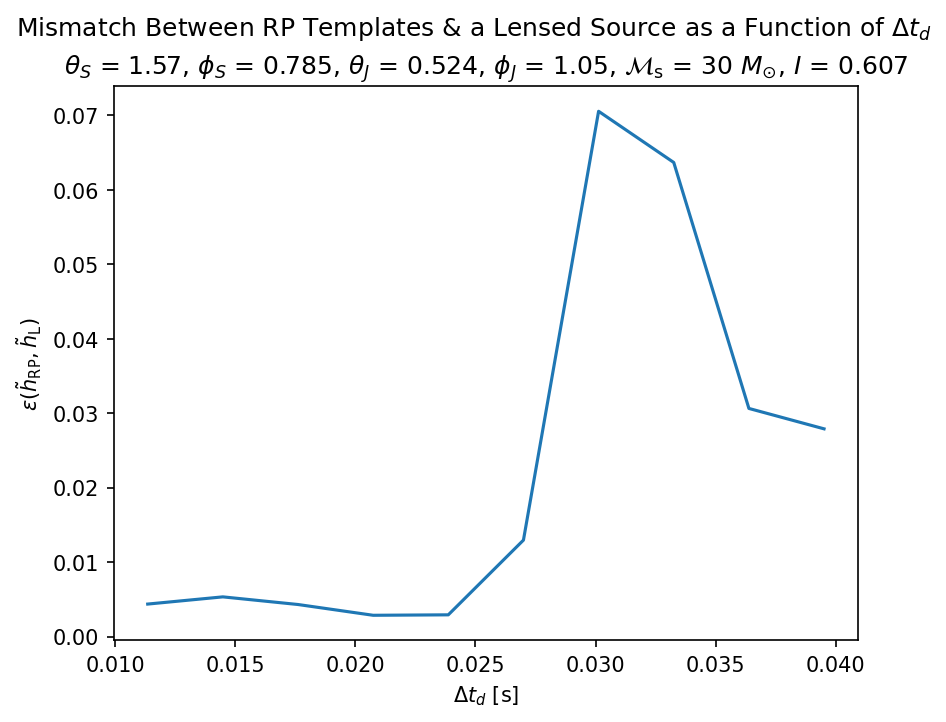

In [18]:
td_arr = mismatch_contours_td["td_arr"]
td_ep_min_arr = np.array([mismatch_contours_td[td]["stats"]["ep_min"] for td in td_arr])

plt.plot(td_arr, td_ep_min_arr, label=r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")
plt.xlabel(r"$\Delta t_d$ [s]")
plt.ylabel(r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        lens_params["theta_S"],
        lens_params["phi_S"],
        lens_params["theta_J"],
        lens_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        lens_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        mismatch_contours_td["I"],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

In [19]:
# calculate stats of td_ep_min_arr using numpy
td_ep_min_mean = np.mean(td_ep_min_arr)
td_ep_min_std = np.std(td_ep_min_arr)
td_ep_min_max = np.max(td_ep_min_arr)
td_ep_min_min = np.min(td_ep_min_arr)

print(
    "Mean of td_ep_min_arr: {:.3g}\nStd of td_ep_min_arr: {:.3g}\nMax of td_ep_min_arr: {:.3g}\nMin of td_ep_min_arr: {:.3g}".format(
        td_ep_min_mean, td_ep_min_std, td_ep_min_max, td_ep_min_min
    )
)

Mean of td_ep_min_arr: 0.0225
Std of td_ep_min_arr: 0.0243
Max of td_ep_min_arr: 0.0705
Min of td_ep_min_arr: 0.00286


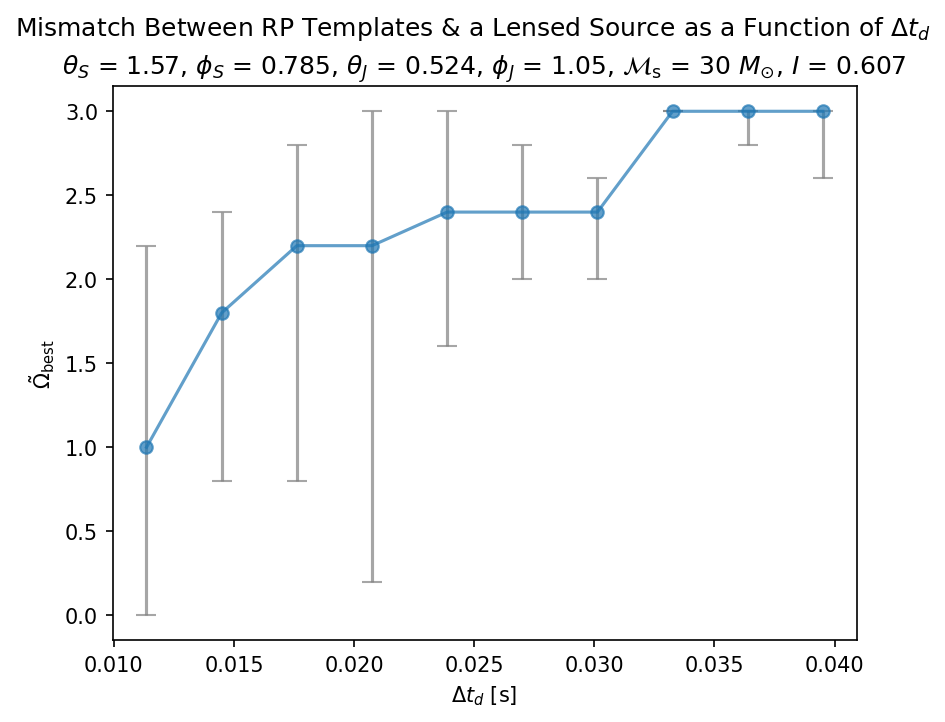

In [16]:
td_arr = mismatch_contours_td["td_arr"]
td_ep_min_omega_tilde_arr = np.array(
    [mismatch_contours_td[td]["stats"]["ep_min_omega_tilde"] for td in td_arr]
)

plt.errorbar(
    td_arr,
    td_ep_min_omega_tilde_arr,
    yerr=get_asym_err(mismatch_contours_td, td_arr, "omega_tilde"),
    fmt="-o",
    label=r"$\~{\Omega}_{\rm best}$",
    capsize=5,
    ecolor="grey",
    alpha=0.7,
)
plt.xlabel(r"$\Delta t_d$ [s]")
plt.ylabel(r"$\~{\Omega}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        lens_params["theta_S"],
        lens_params["phi_S"],
        lens_params["theta_J"],
        lens_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        lens_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        mismatch_contours_td["I"],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

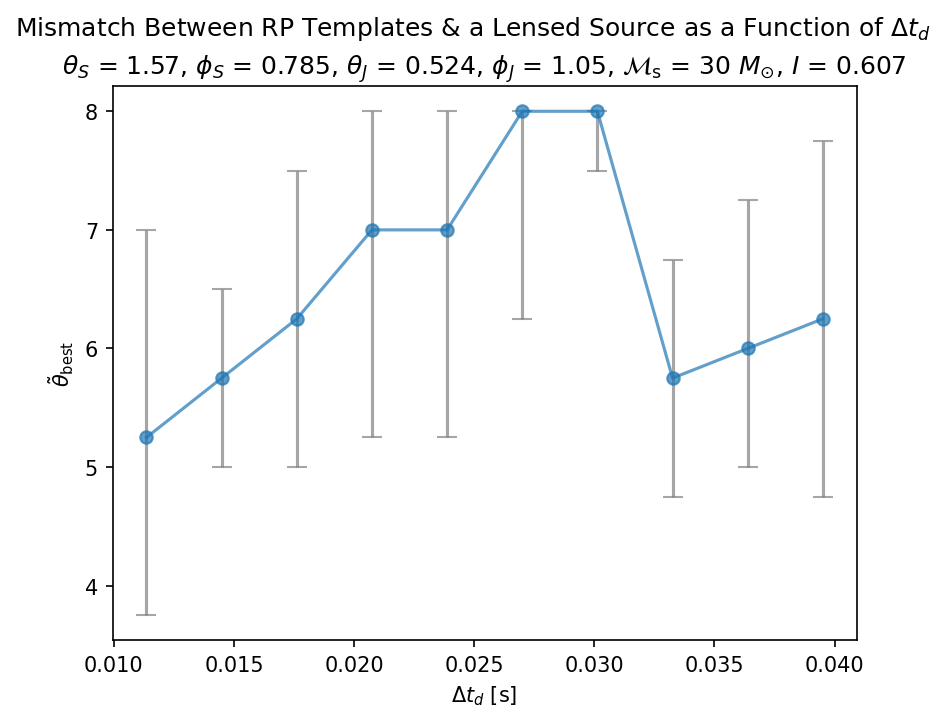

In [17]:
lens_params = mismatch_contours_td["source_params"]
td_arr = mismatch_contours_td["td_arr"]
td_ep_min_theta_tilde_arr = np.array(
    [mismatch_contours_td[td]["stats"]["ep_min_theta_tilde"] for td in td_arr]
)

plt.errorbar(
    td_arr,
    td_ep_min_theta_tilde_arr,
    yerr=get_asym_err(mismatch_contours_td, td_arr, "theta_tilde"),
    fmt="-o",
    label=r"$\~{\theta}_{\rm best}$",
    capsize=5,
    ecolor="grey",
    alpha=0.7,
)
plt.xlabel(r"$\Delta t_d$ [s]")
plt.ylabel(r"$\~{\theta}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        lens_params["theta_S"],
        lens_params["phi_S"],
        lens_params["theta_J"],
        lens_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        lens_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        mismatch_contours_td["I"],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

# as a function of $I$ while fixing $\Delta t_d$

In [21]:
lens_params, RP_params = set_to_params(lens_params_1, RP_params_1)

y_arr = np.linspace(0.5, 3, 10)[::-1]
mismatch_contours_I = create_mismatch_contours_I(RP_params, lens_params, 0.02, y_arr)

[ 130.16052984  148.64661292  171.43432143  200.09193141  237.07512777
  286.48617141  355.78654502  460.22495837  636.77776954 1004.60407777]


In [22]:
mismatch_contours_I = get_contours_stats(mismatch_contours_I, thres_diff=0.01)

In [4]:
filepath = pickle_data(mismatch_contours_I, "../data", "mismatch_contours_mcz30_I_ver6")

Results saved as ../data/mismatch_contours_I_2024-04-29_08-23-04.pkl


In [5]:
with open(filepath, "rb") as f:
    mismatch_contours_I = pickle.load(f)

mismatch_contours_I

{0.008403954844176704: {'contour': {'omega_matrix': array([[0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
           1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ],
          [0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
           1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ],
          [0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
           1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ],
          [0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
           1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ],
          [0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
           1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ],
          [0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
           1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ],
          [0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
           1.66666667,

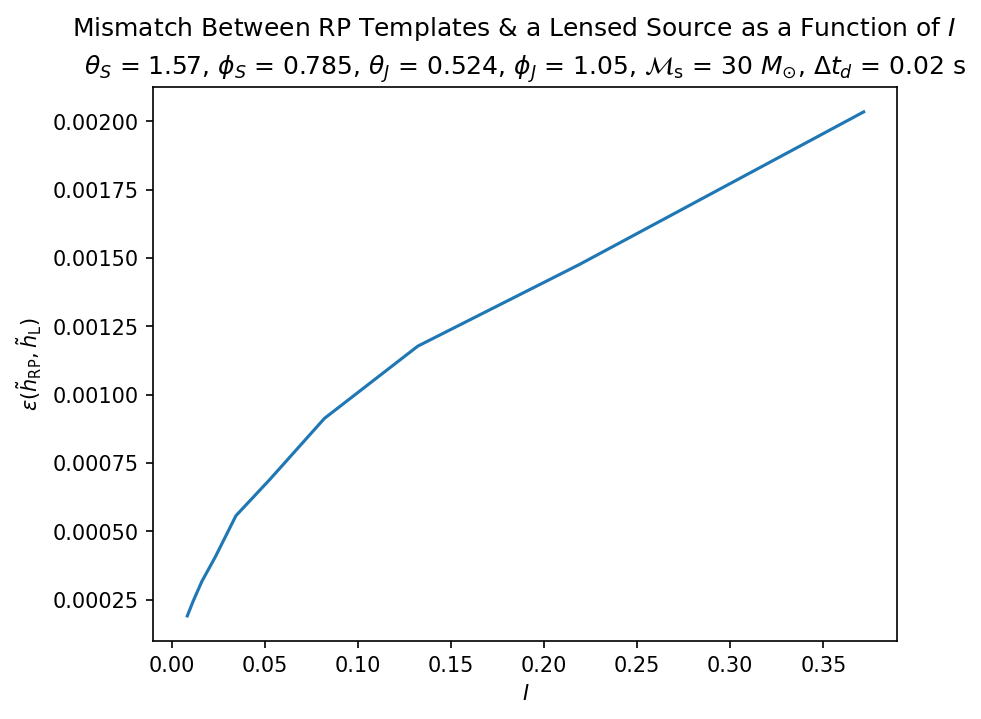

In [23]:
I_arr = mismatch_contours_I["I_arr"]
I_ep_min_arr = np.array([mismatch_contours_I[I]["stats"]["ep_min"] for I in I_arr])

plt.plot(I_arr, I_ep_min_arr, label=r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")
plt.xlabel(r"$I$")
plt.ylabel(r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} s".format(
        lens_params["theta_S"],
        lens_params["phi_S"],
        lens_params["theta_J"],
        lens_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        lens_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        mismatch_contours_I["td"],
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

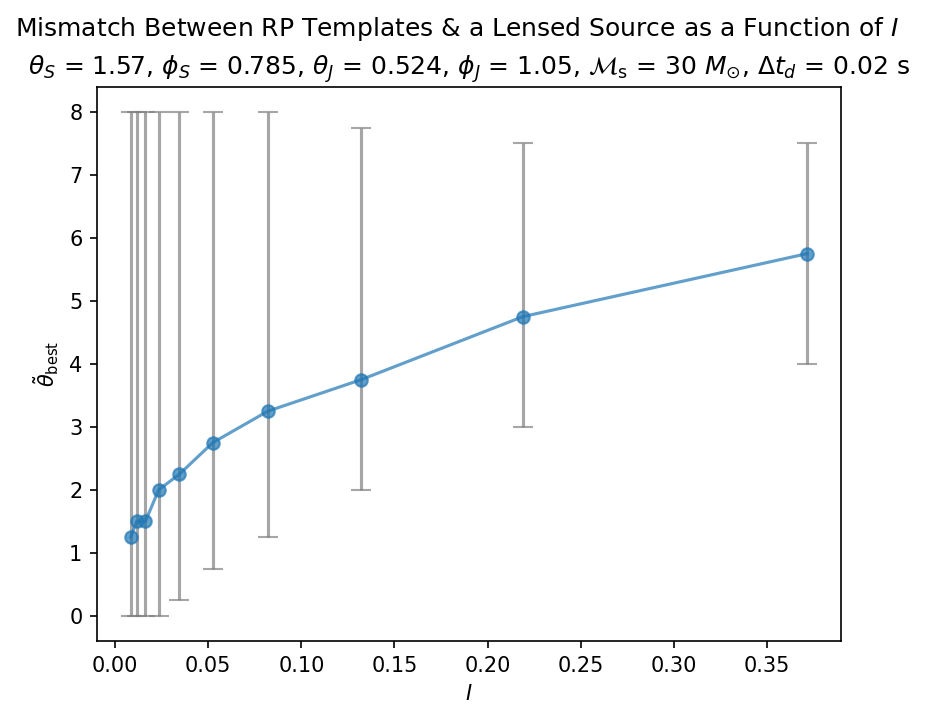

In [24]:
I_arr = mismatch_contours_I["I_arr"]
I_ep_min_theta_tilde_arr = np.array(
    [mismatch_contours_I[I]["stats"]["ep_min_theta_tilde"] for I in I_arr]
)

plt.errorbar(
    I_arr,
    I_ep_min_theta_tilde_arr,
    yerr=get_asym_err(mismatch_contours_I, I_arr, "theta_tilde"),
    fmt="-o",
    label=r"$\~{\theta}_{\rm best}$",
    capsize=5,
    ecolor="grey",
    alpha=0.7,
)
plt.xlabel(r"$I$")
plt.ylabel(r"$\~{\theta}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} s".format(
        lens_params["theta_S"],
        lens_params["phi_S"],
        lens_params["theta_J"],
        lens_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        lens_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        mismatch_contours_I["td"],
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

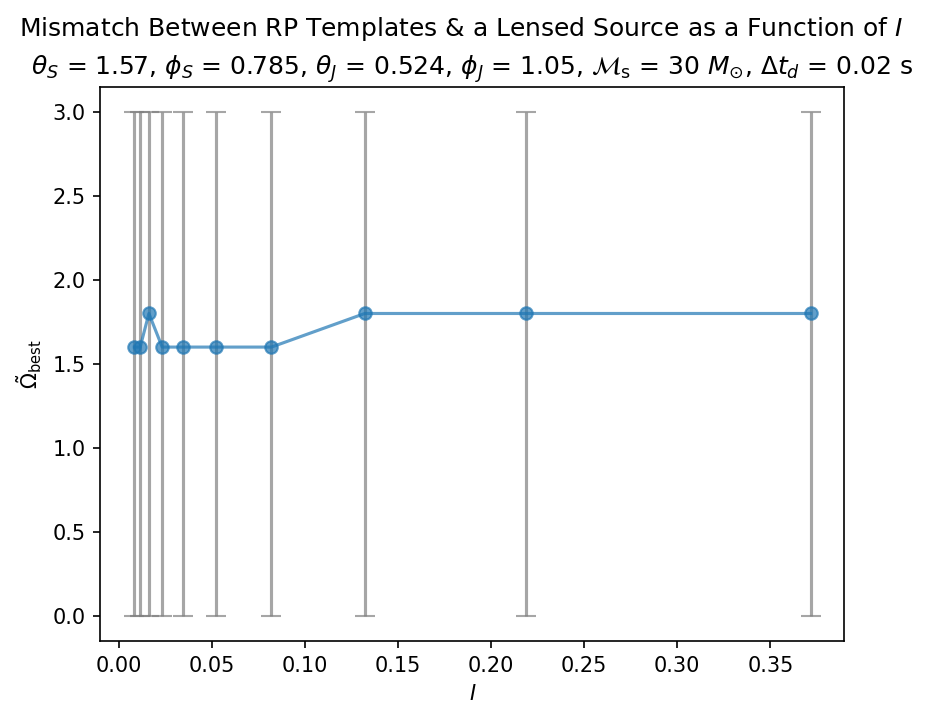

In [25]:
lens_params = mismatch_contours_I["source_params"]
I_arr = mismatch_contours_I["I_arr"]
I_ep_min_omega_tilde_arr = np.array(
    [mismatch_contours_I[I]["stats"]["ep_min_omega_tilde"] for I in I_arr]
)

plt.errorbar(
    I_arr,
    I_ep_min_omega_tilde_arr,
    yerr=get_asym_err(mismatch_contours_I, I_arr, "omega_tilde"),
    fmt="-o",
    label=r"$\~{\Omega}_{\rm best}$",
    capsize=5,
    ecolor="grey",
    alpha=0.7,
)

plt.xlabel(r"$I$")
plt.ylabel(r"$\~{\Omega}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} s".format(
        lens_params["theta_S"],
        lens_params["phi_S"],
        lens_params["theta_J"],
        lens_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        lens_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        mismatch_contours_I["td"],
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

# waveform comparison

idx = 5.12594e-09, phi = 3.53625e-08, both should be ~0 if get_updated_mismatch_results is True


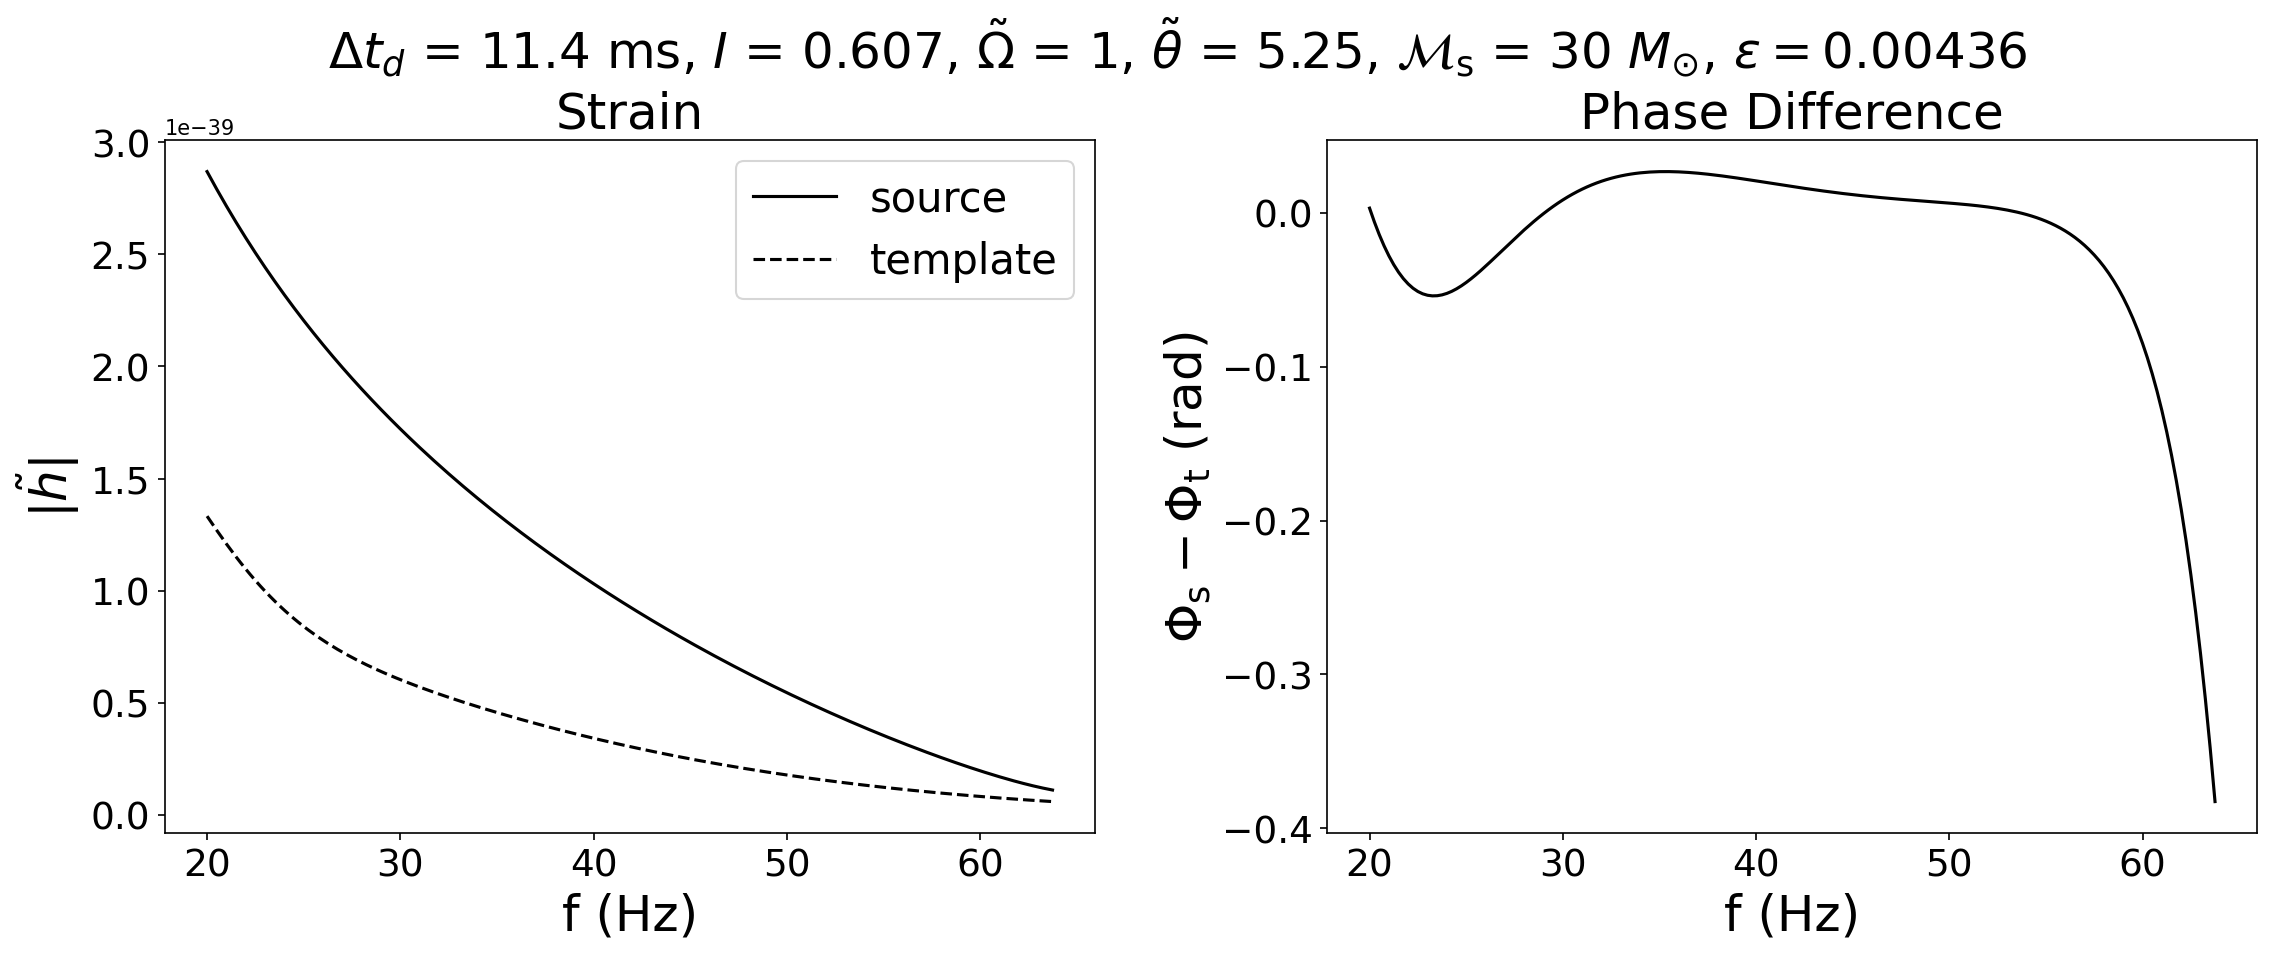

idx = -4.93452e-09, phi = 2.25499e-08, both should be ~0 if get_updated_mismatch_results is True


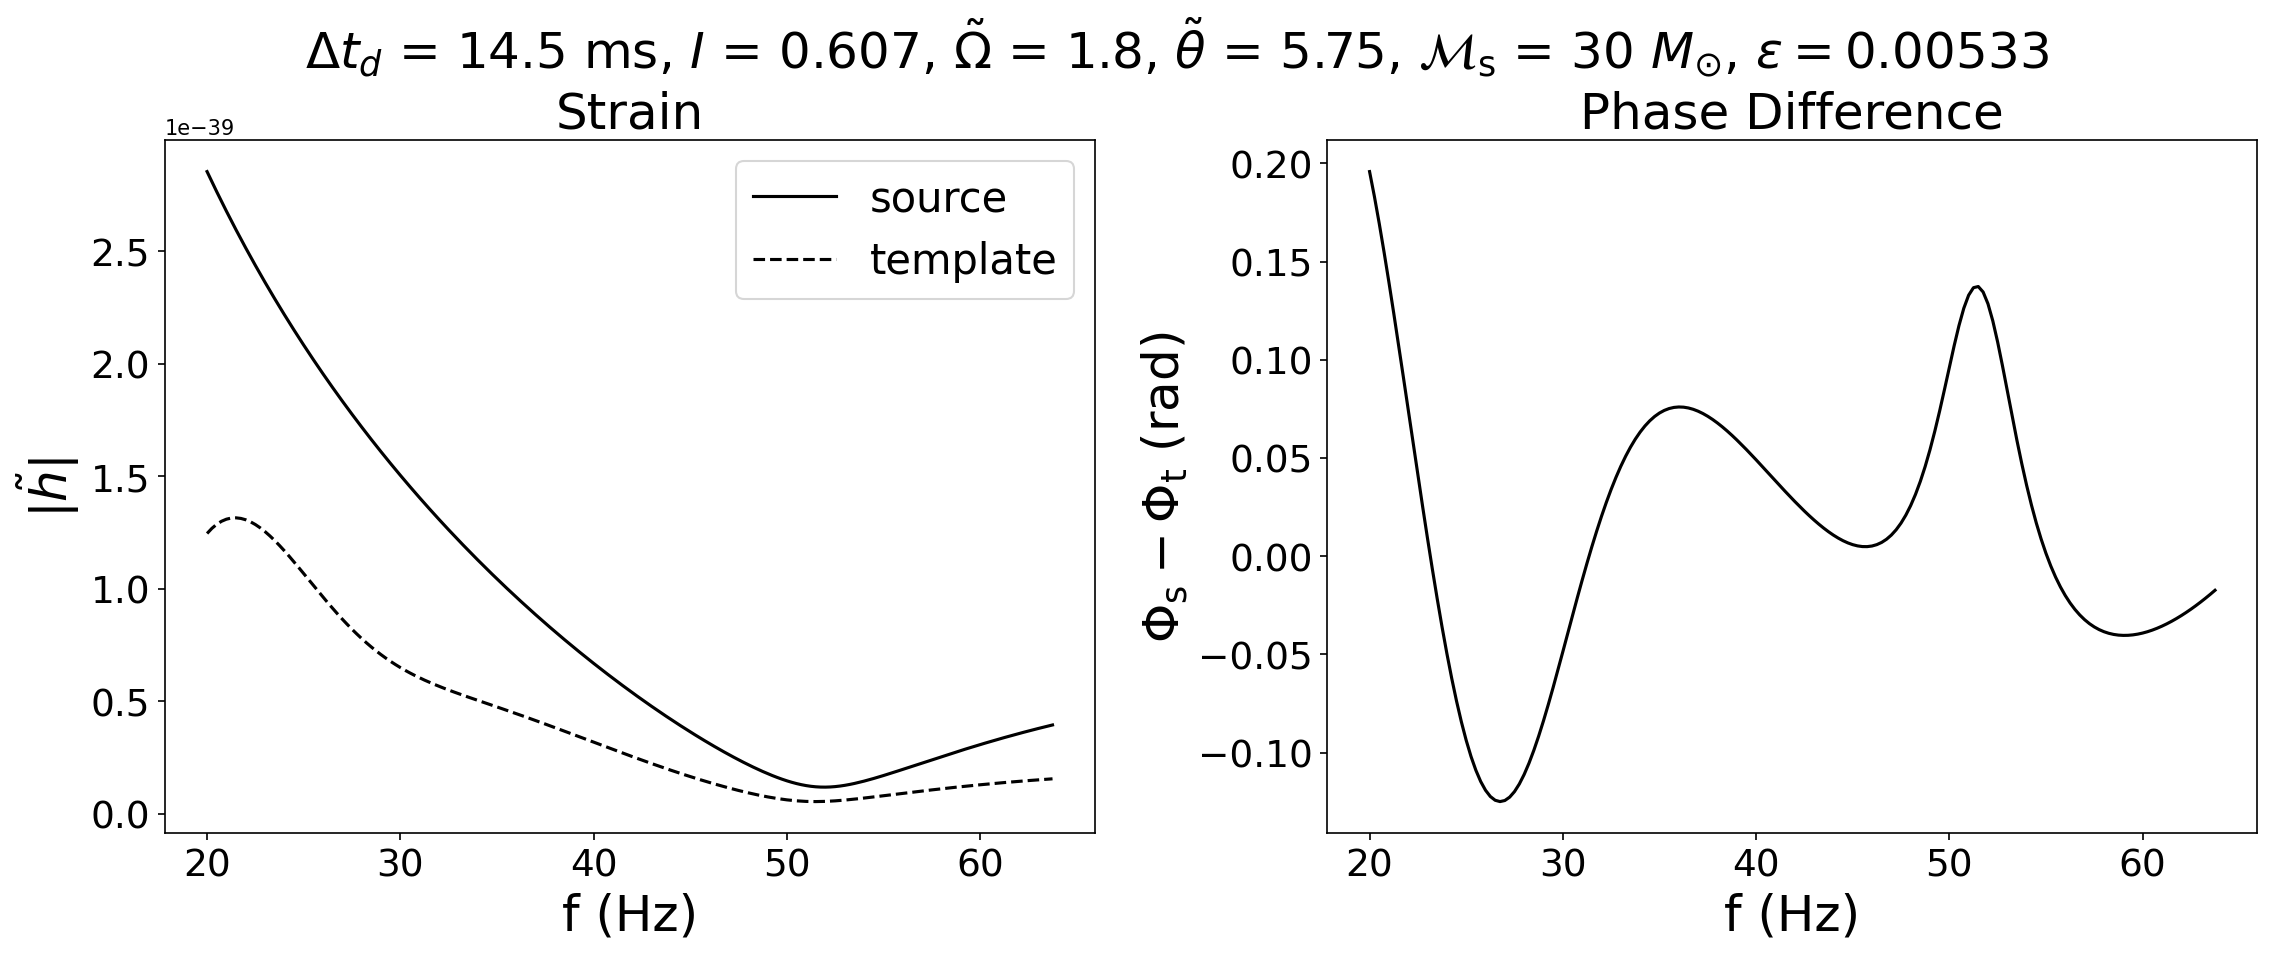

idx = -2.5923, phi = 3.64603e-12, both should be ~0 if get_updated_mismatch_results is True


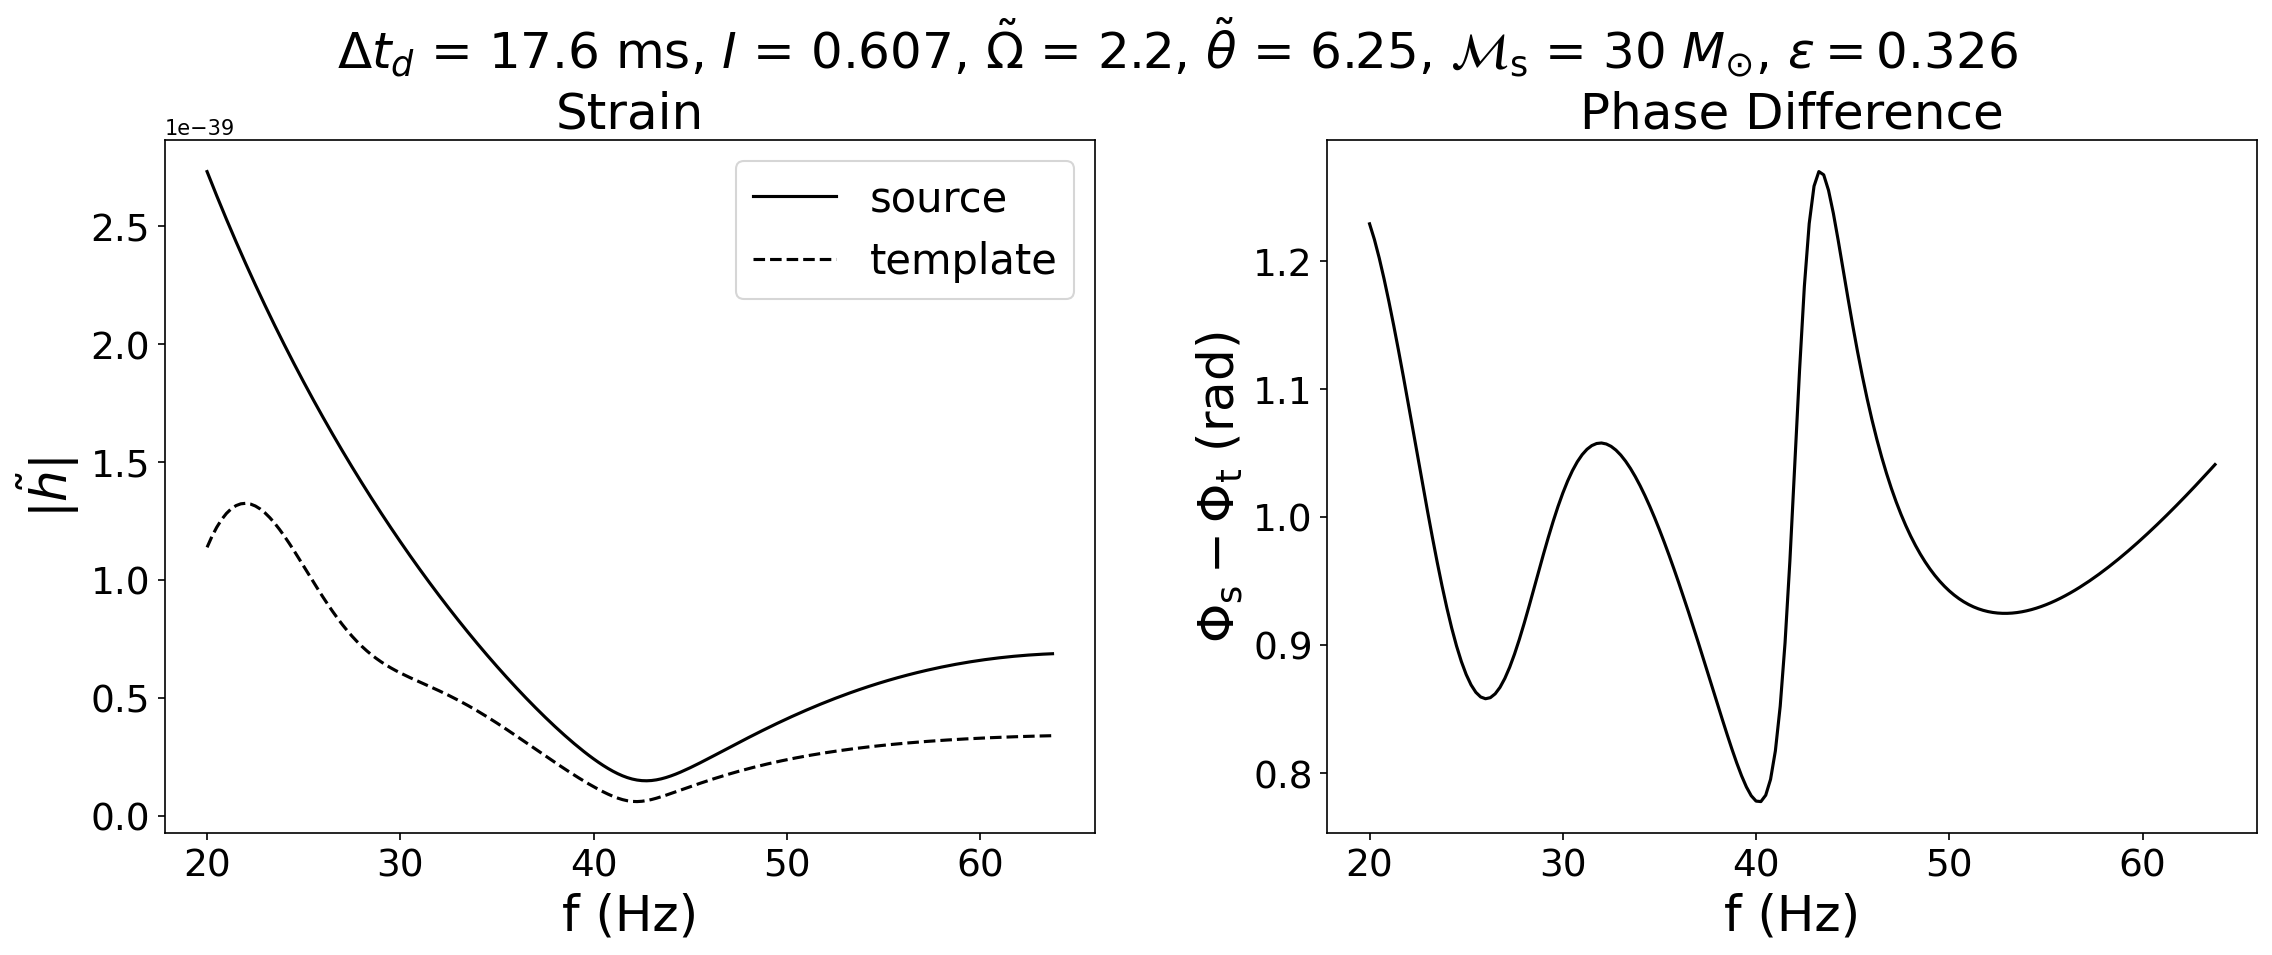

idx = -6.62207e-10, phi = 1.56713e-08, both should be ~0 if get_updated_mismatch_results is True


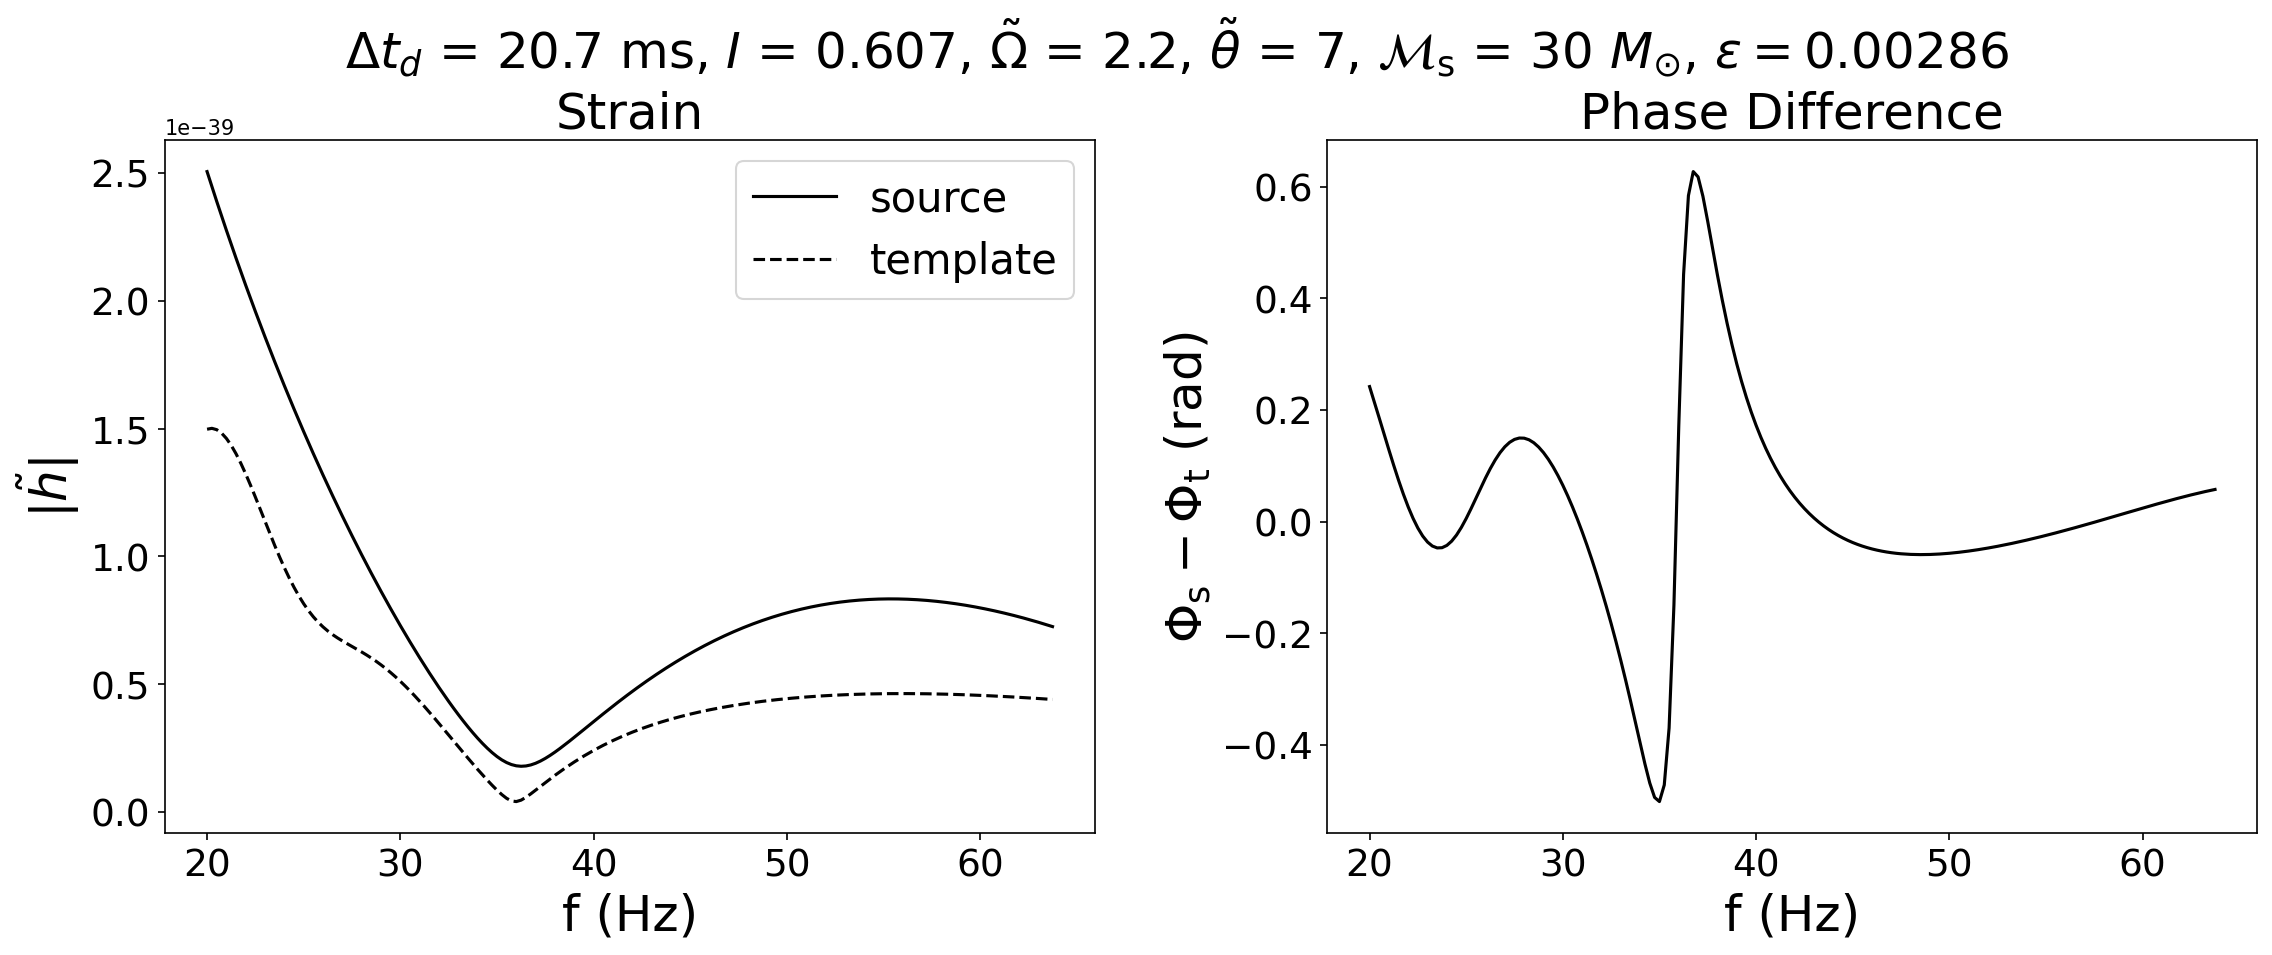

idx = 2.50646e-08, phi = -3.43041e-09, both should be ~0 if get_updated_mismatch_results is True


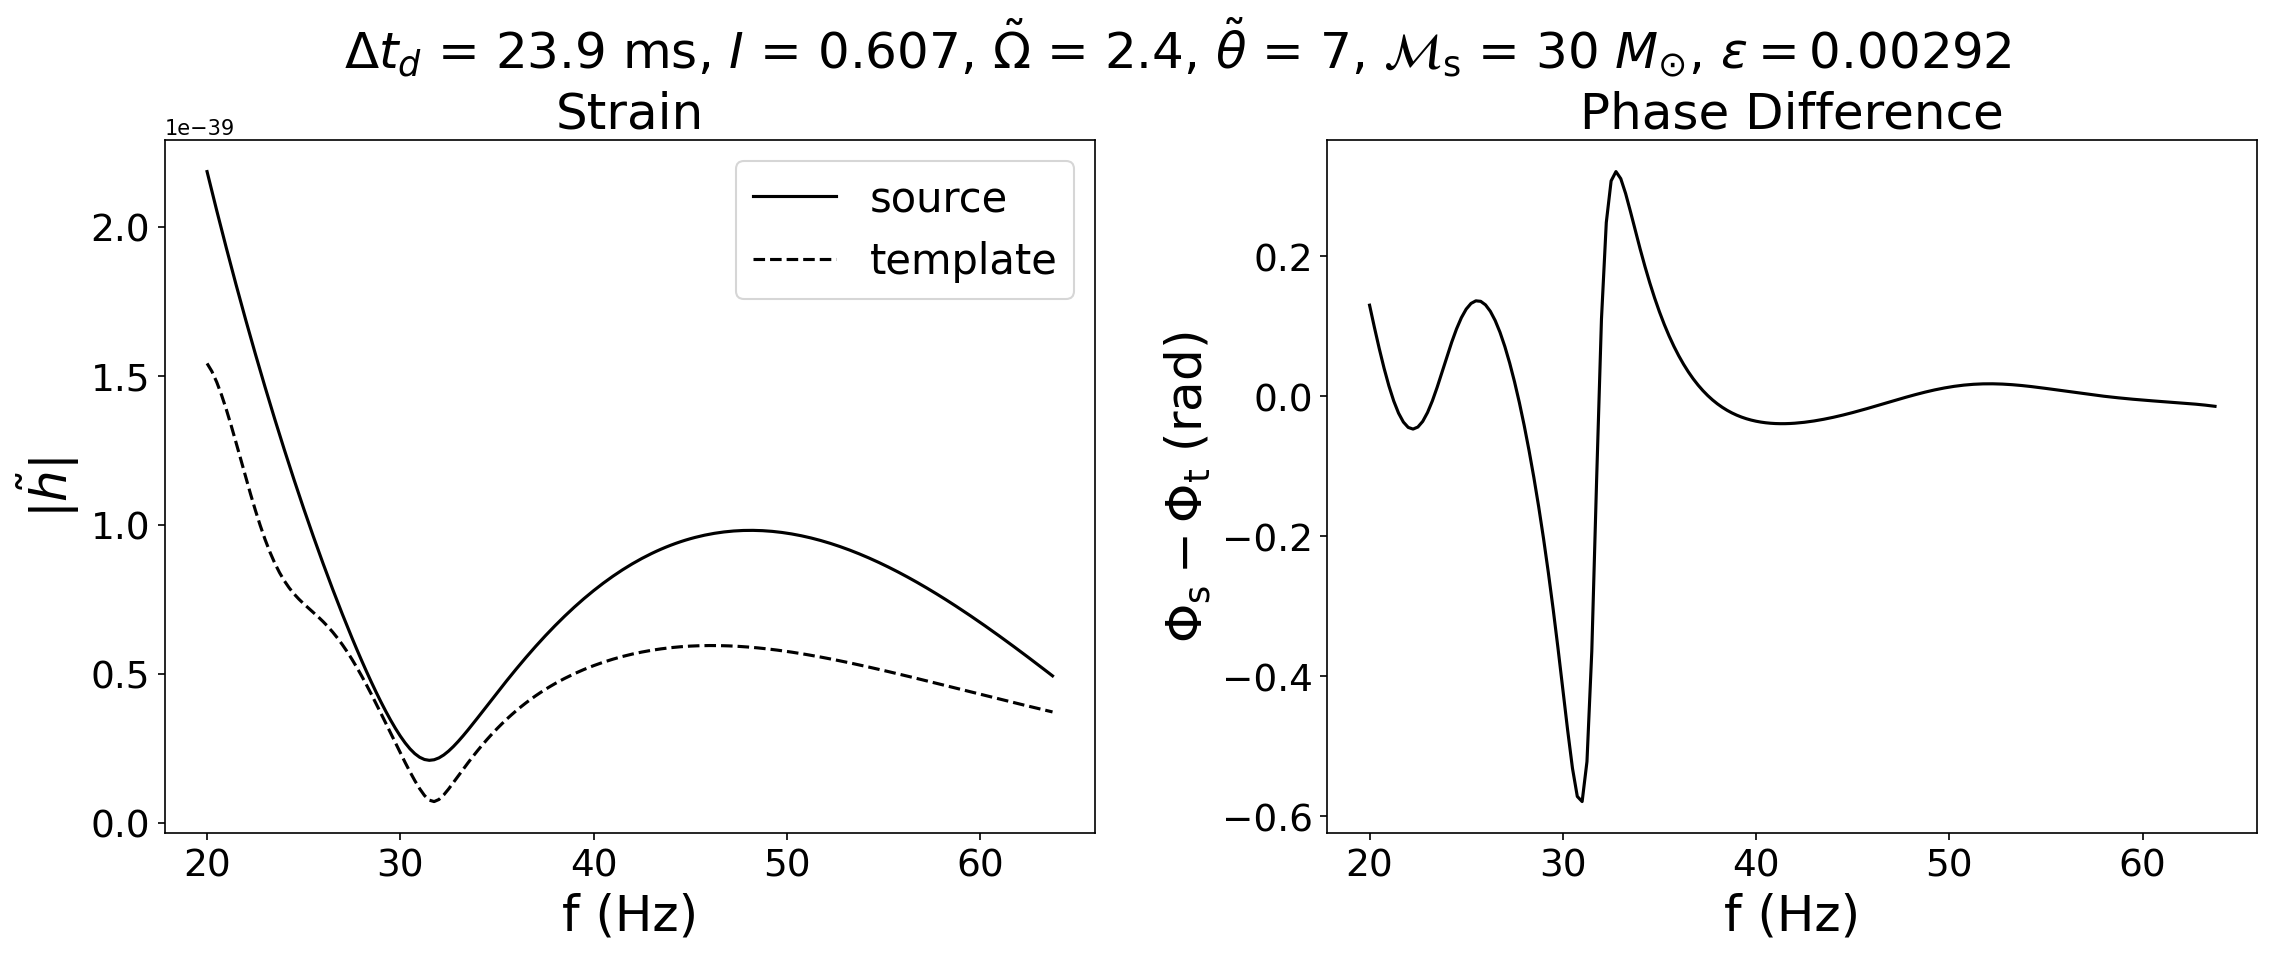

idx = 1.12709e-08, phi = 4.2606e-09, both should be ~0 if get_updated_mismatch_results is True


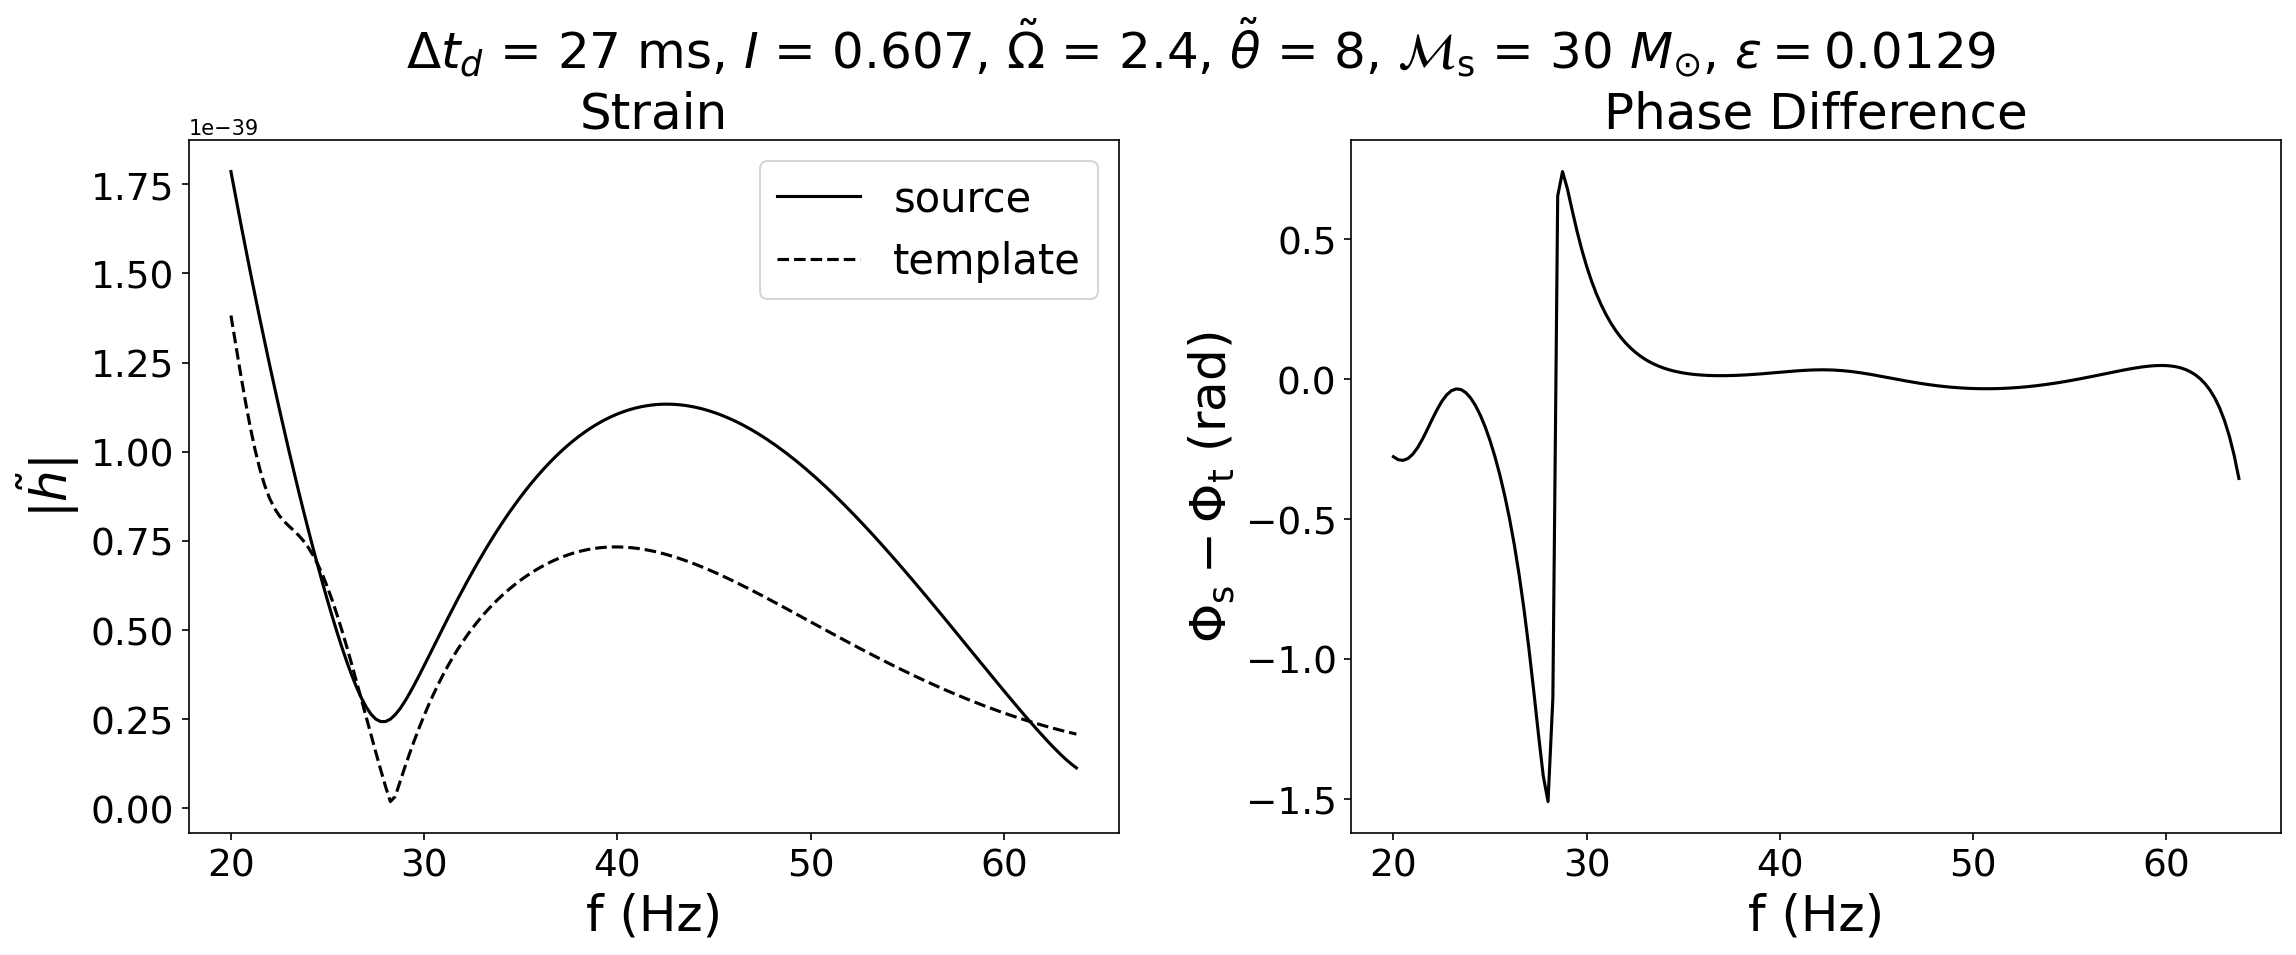

idx = -3.66123e-08, phi = 2.1241e-08, both should be ~0 if get_updated_mismatch_results is True


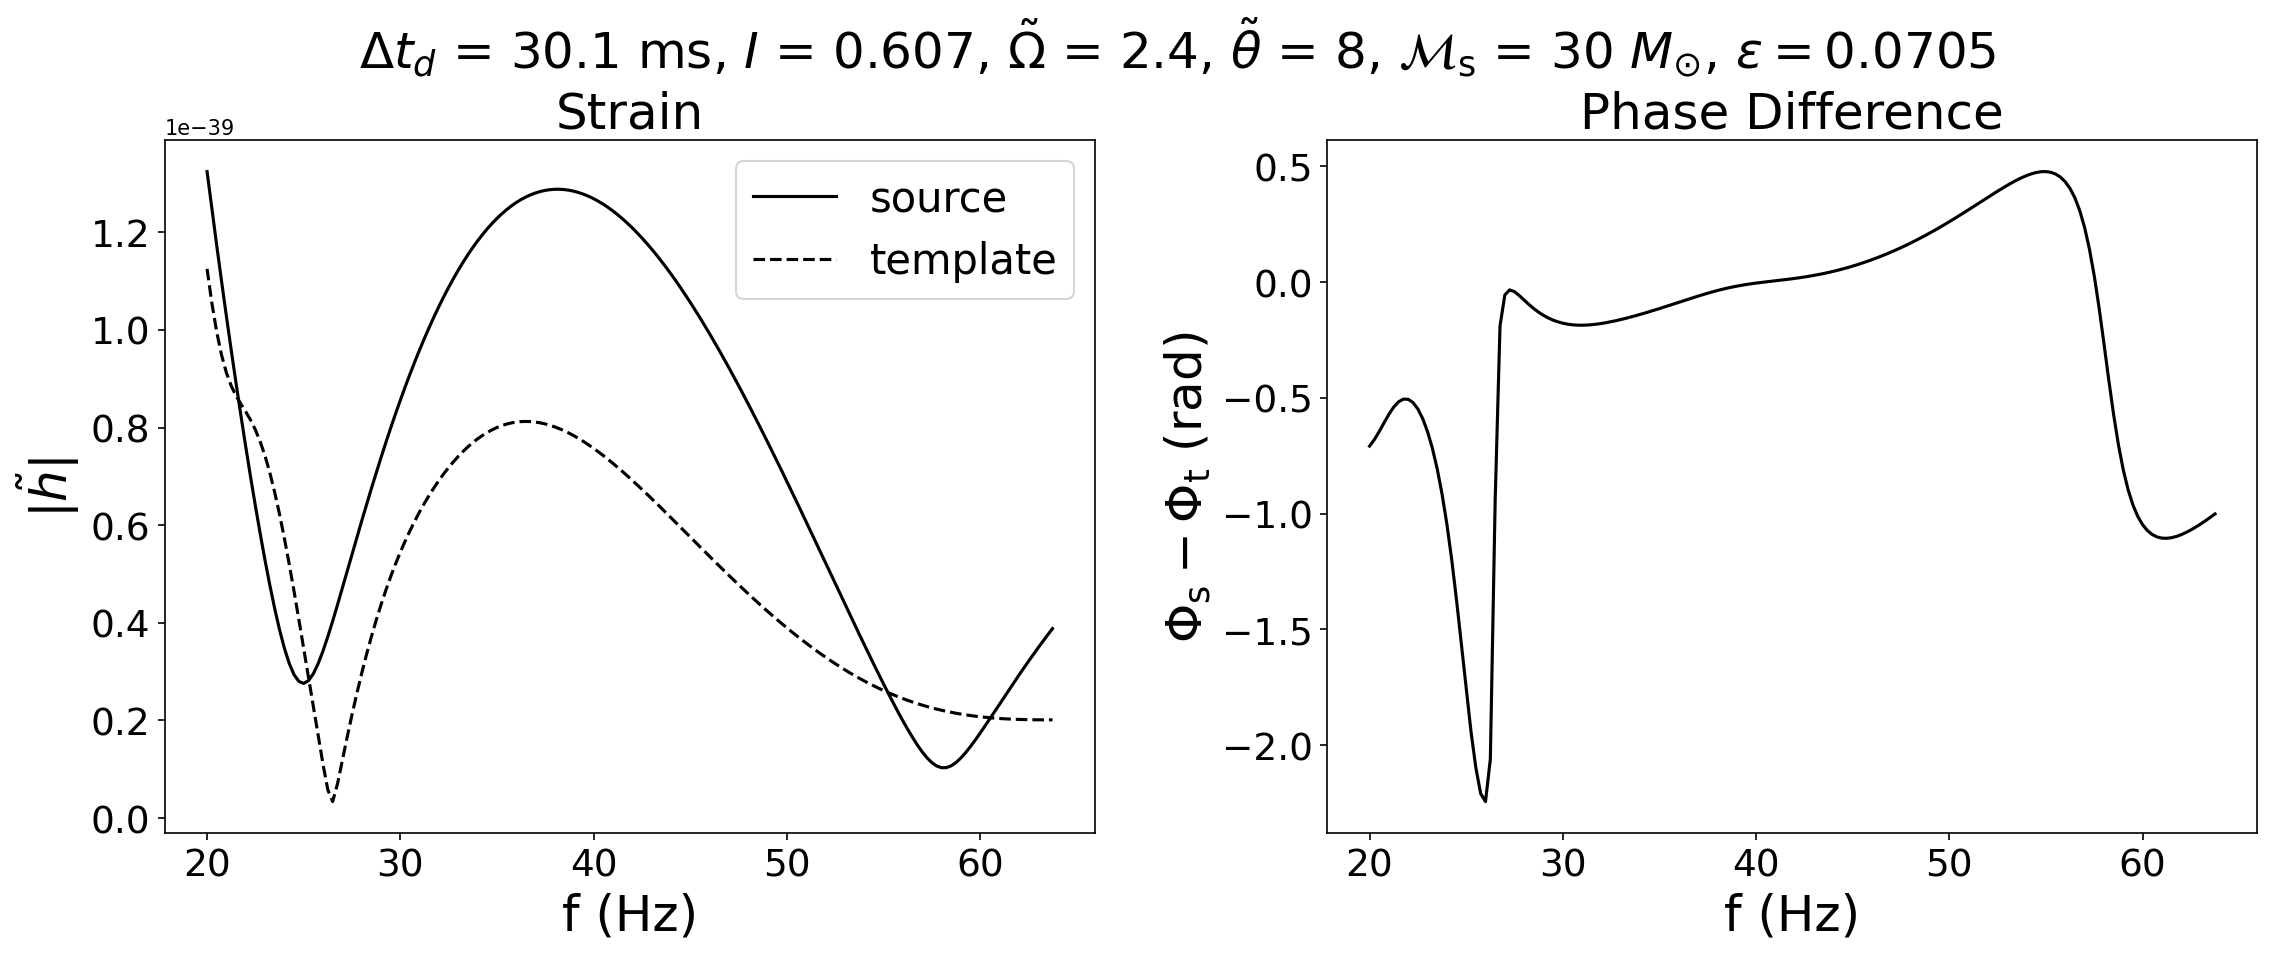

idx = -3.84818e-09, phi = -2.24765e-08, both should be ~0 if get_updated_mismatch_results is True


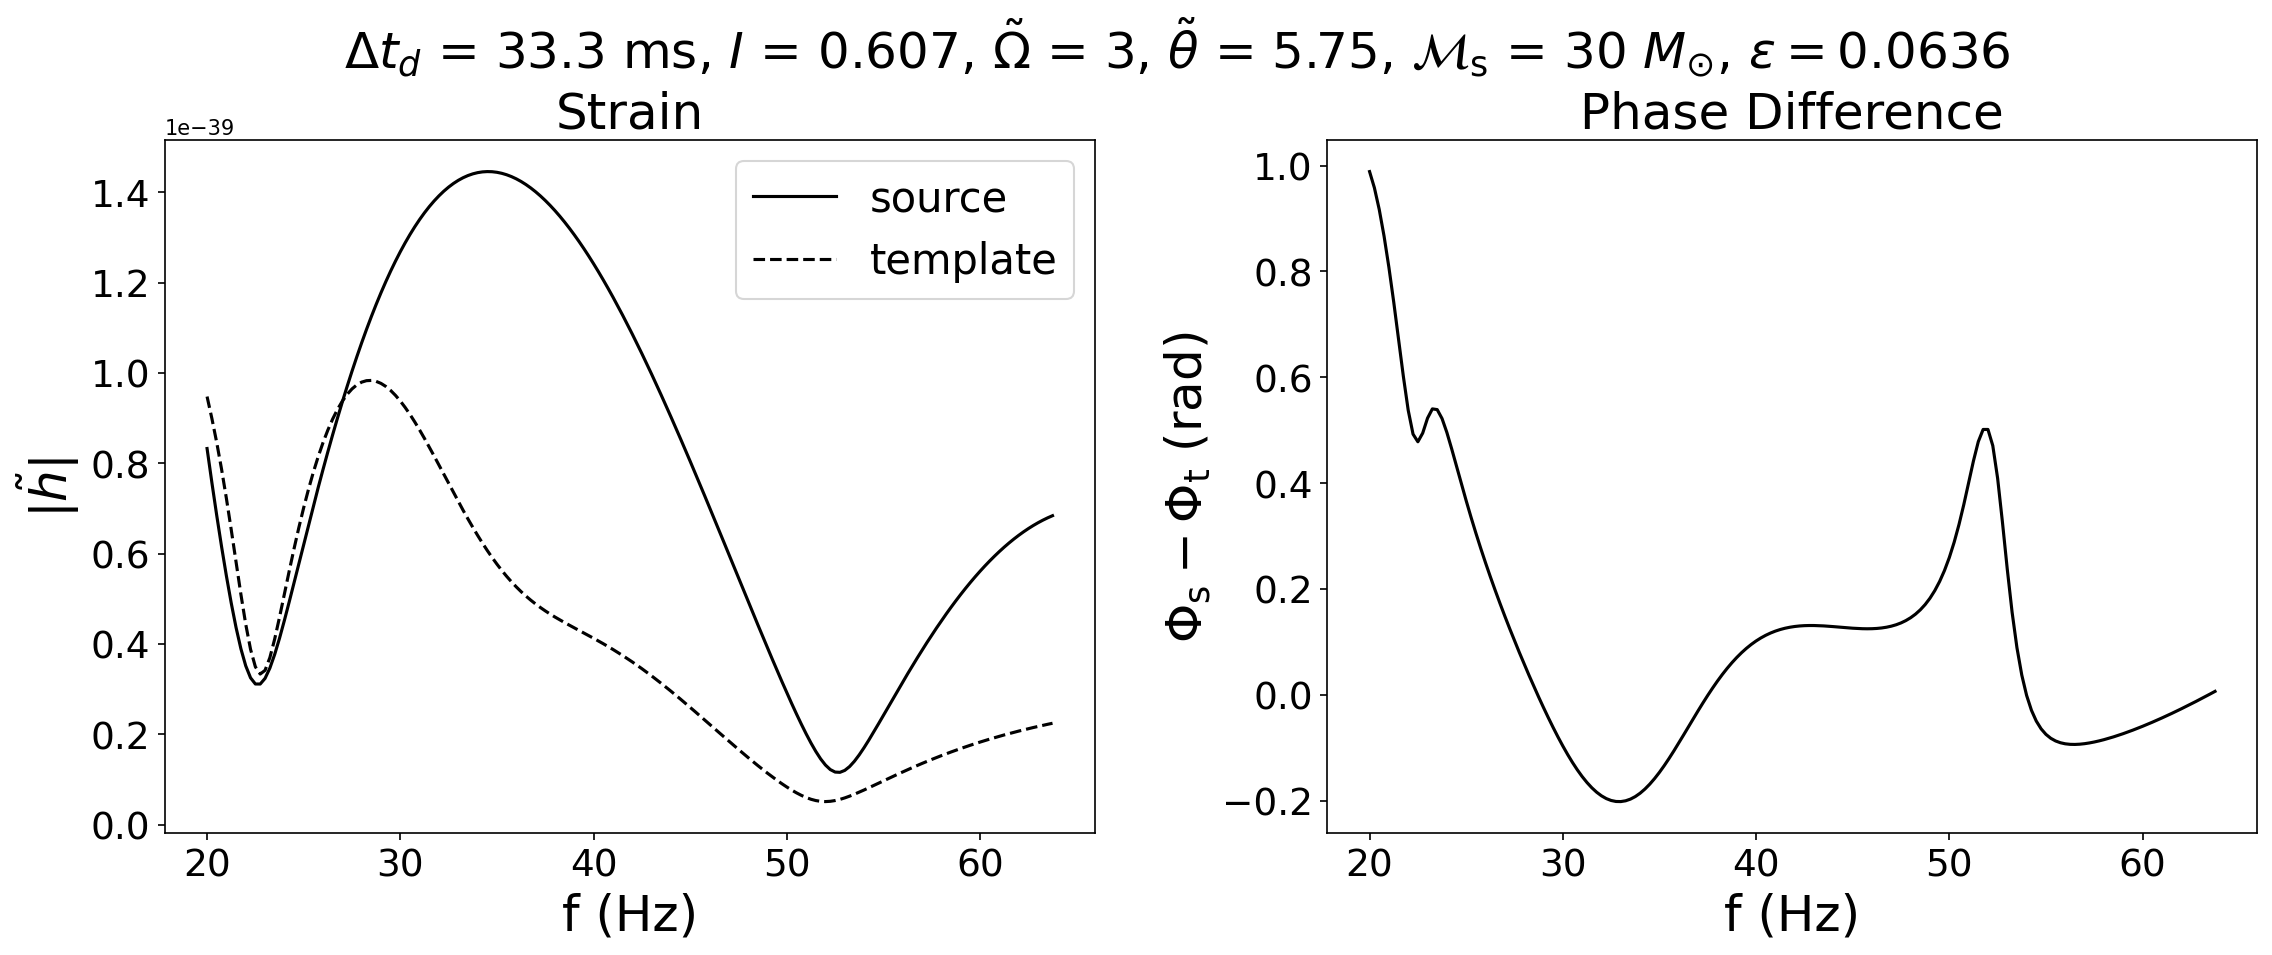

idx = -5.56581e-09, phi = 7.05069e-09, both should be ~0 if get_updated_mismatch_results is True


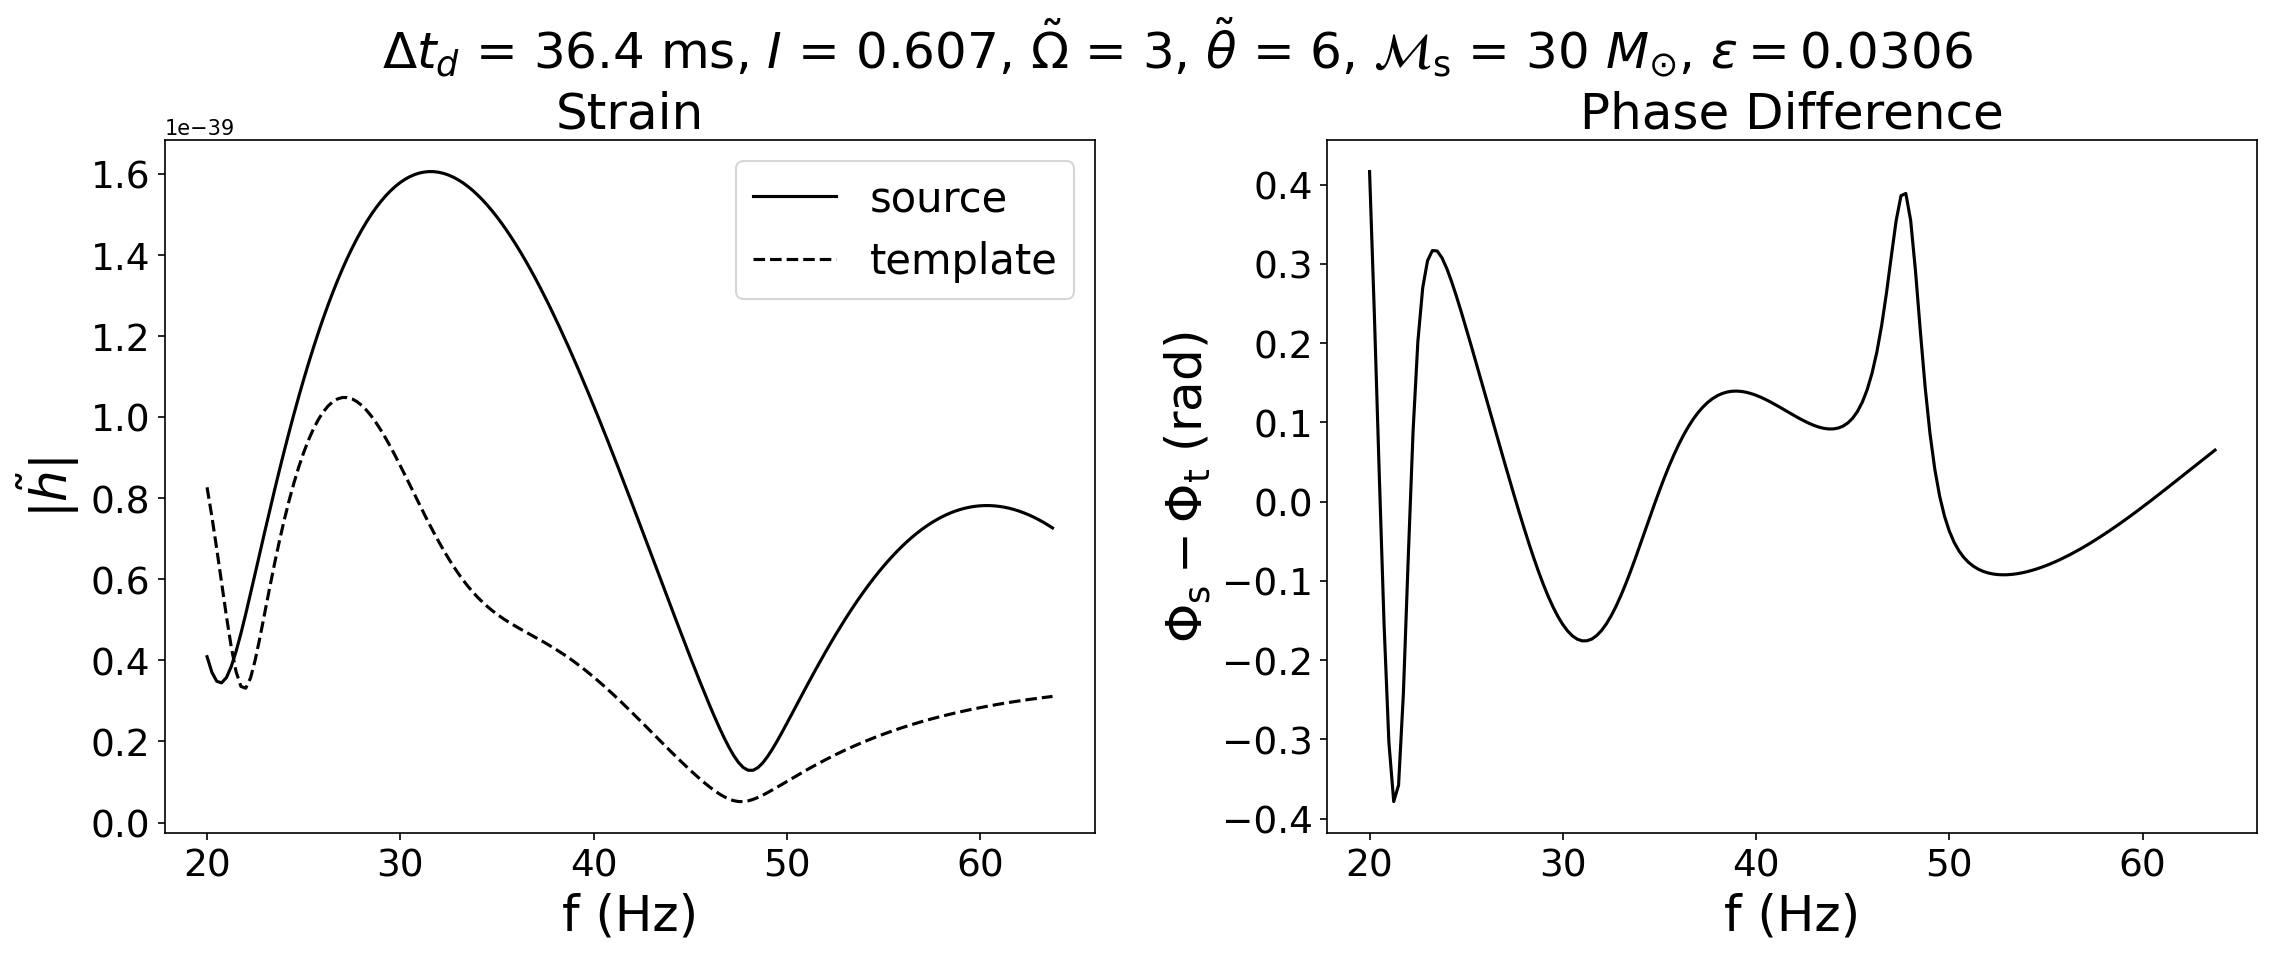

idx = 3.55333e-09, phi = -3.13542e-08, both should be ~0 if get_updated_mismatch_results is True


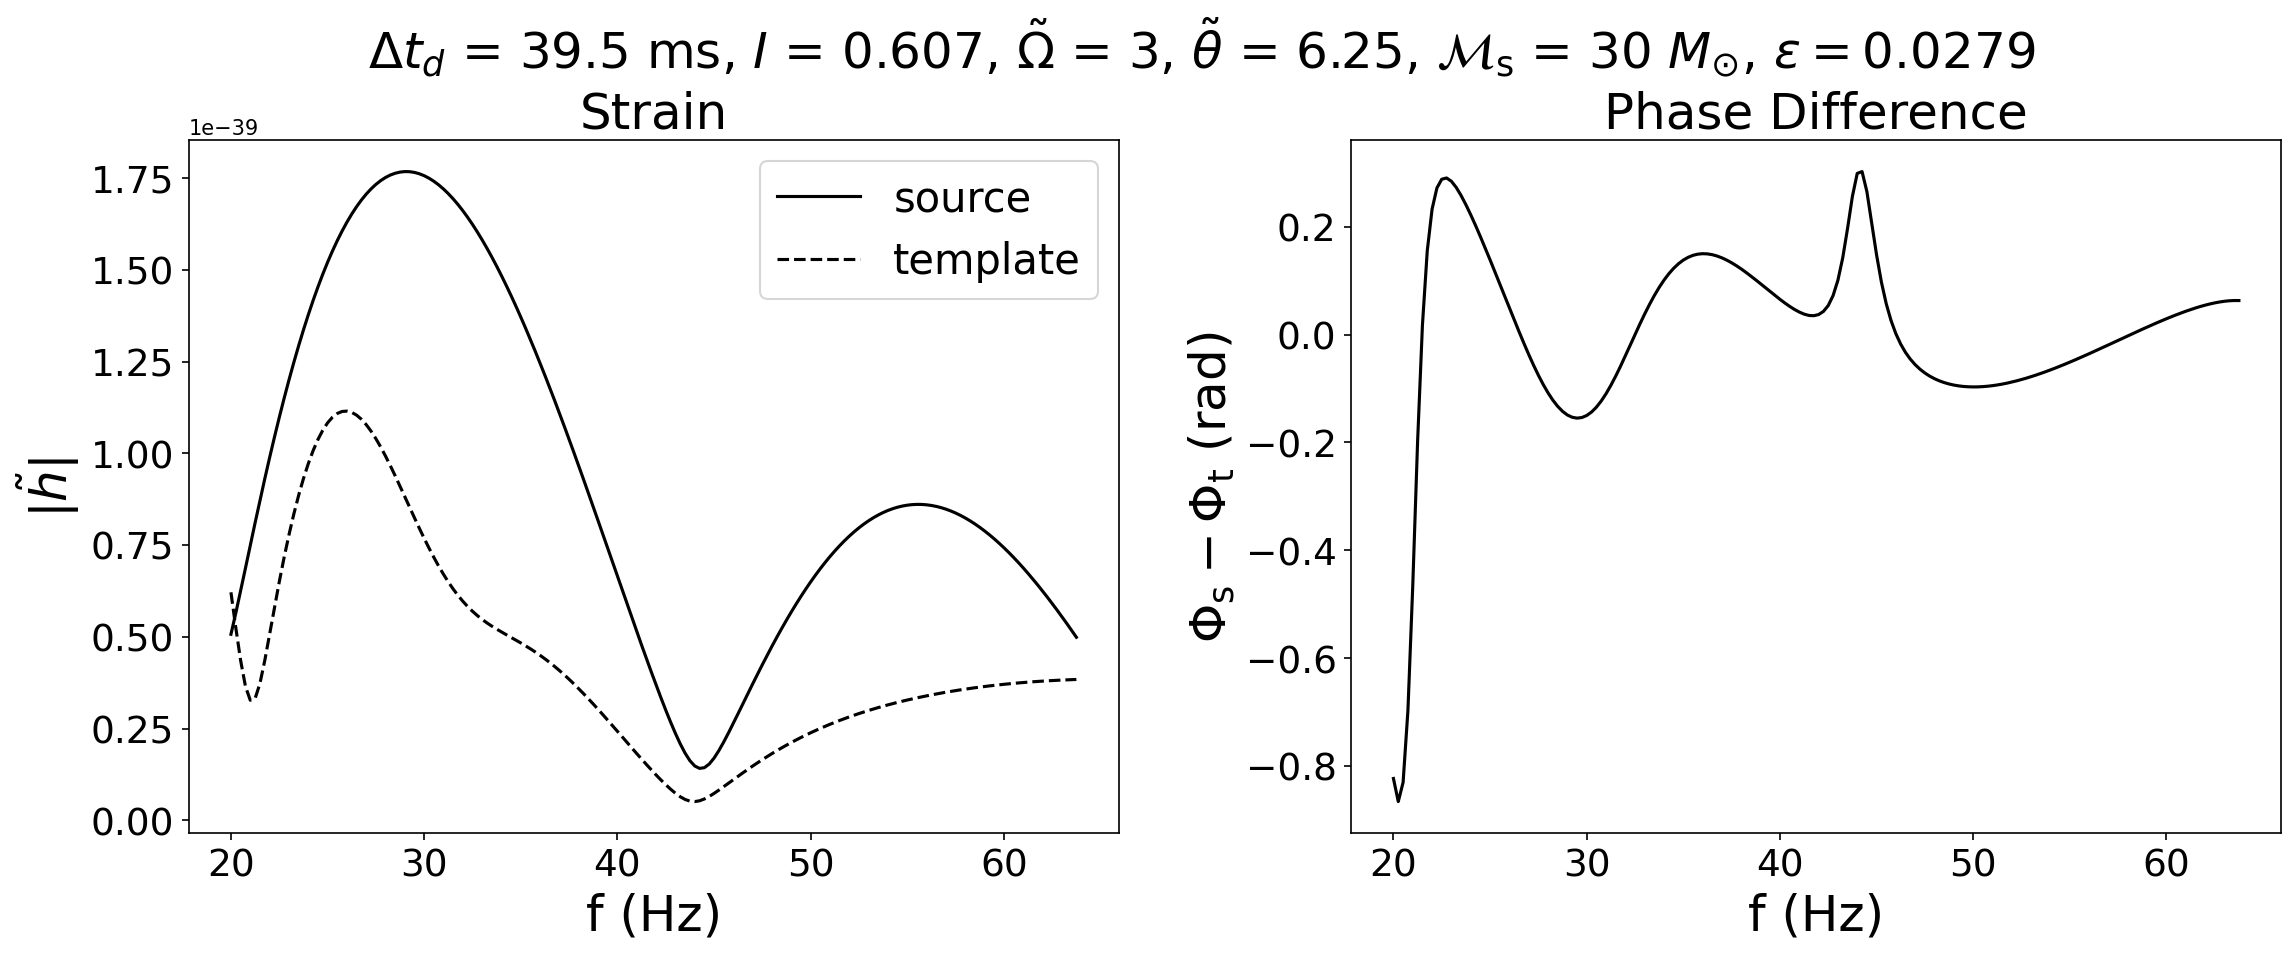

In [24]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

MLz_arr = mismatch_contours_td["MLz_arr"]
td_arr = mismatch_contours_td["td_arr"]

for i in range(len(MLz_arr)):
    lens_params, RP_params = set_to_params(lens_params_1, RP_params_1)
    lens_params["MLz"] = MLz_arr[i] * solar_mass
    RP_params["omega_tilde"] = mismatch_contours_td[td_arr[i]]["stats"][
        "ep_min_omega_tilde"
    ]
    RP_params["theta_tilde"] = mismatch_contours_td[td_arr[i]]["stats"][
        "ep_min_theta_tilde"
    ]
    RP_params["gamma_P"] = mismatch_contours_td[td_arr[i]]["stats"]["ep_min_gammaP"]

    plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
    plt.show()

In [ ]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

y_arr = mismatch_contours_I["y_arr"]
MLz_arr = mismatch_contours_I["MLz_arr"]
I_arr = mismatch_contours_I["I_arr"]

for i in range(len(y_arr)):
    lens_params, RP_params = set_to_params(lens_params_1, RP_params_1)
    lens_params["y"] = y_arr[i]
    lens_params["MLz"] = MLz_arr[i] * solar_mass
    RP_params["omega_tilde"] = mismatch_contours_I[I_arr[i]]["stats"][
        "ep_min_omega_tilde"
    ]
    RP_params["theta_tilde"] = mismatch_contours_I[I_arr[i]]["stats"][
        "ep_min_theta_tilde"
    ]
    RP_params["gamma_P"] = mismatch_contours_I[I_arr[i]]["stats"]["ep_min_gammaP"]

    plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
    plt.show()